In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,backend_yn,python_yn,java_yn,database_yn,linux_yn,networking_yn,testing_yn,cyber_yn,aws_yn
0,"Software Engineer, Database Engine",$106K-$236K (Glassdoor Est.),Position Overview\n\n\nThe MemSQL database eng...,4.6,MemSQL\n4.6,"San Francisco, CA",-1,201 to 500 Employees,2011,Company - Private,...,9,0,0,0,1,1,1,1,0,0
1,Software Development Engineer - Distributed Da...,$106K-$236K (Glassdoor Est.),Join our team and experience Workday!\n\nIt's ...,4.0,Workday\n4.0,"Pleasanton, CA",-1,10000+ Employees,2005,Company - Public,...,15,0,0,1,1,1,0,0,0,0
2,Software Engineer I,$106K-$236K (Glassdoor Est.),Software Engineer\n\nEnvision is seeking a Jun...,4.5,Envision LLC\n4.5,"Mesa, AZ",-1,201 to 500 Employees,1994,Company - Private,...,26,0,0,1,1,1,0,1,0,1
3,Entry-Level Software Developer (VDF),$106K-$236K (Glassdoor Est.),"HCSS, an innovative construction software comp...",4.2,HCSS\n4.2,"Houston, TX",-1,201 to 500 Employees,1986,Company - Private,...,34,0,0,0,0,0,0,1,0,0
4,Software Developer,$106K-$236K (Glassdoor Est.),"Named an AJC Top Workplace in 2020, AnswerRock...",4.4,AnswerRocket\n4.4,"Atlanta, GA",-1,51 to 200 Employees,2013,Company - Private,...,7,0,1,1,1,0,0,0,0,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'backend_yn', 'python_yn', 'java_yn', 'database_yn', 'linux_yn',
       'networking_yn', 'testing_yn', 'cyber_yn', 'aws_yn'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data engineer' in title.lower():
        return 'data engineer'
    elif 'full stack' in title.lower():
        return 'full stack'
    elif 'cloud' in title.lower():
        return 'cloud engineer'
    elif 'web' in title.lower():
        return 'web developer'
    elif 'mobile' in title.lower():
        return 'mobile developer'
    elif 'back end' in title.lower() or 'back-end' in title.lower():
        return 'back-end developer'
    else:
        return 'software engineer'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    elif 'entry' in title.lower():
        return 'entry'
    else:
        return 'na'

In [6]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

software engineer     928
web developer          21
full stack             19
mobile developer       14
cloud engineer          8
back-end developer      7
data engineer           3
Name: job_simp, dtype: int64

In [8]:
df['seniority']=df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        979
senior     16
junior      4
entry       1
Name: seniority, dtype: int64

In [9]:
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='michigan' else 'MI')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='new jersey' else 'NJ')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='arizona' else 'AZ')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='new york state' else 'NY')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='virginia' else 'VA')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='maryland' else 'MD')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='ohio' else 'OH')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='california' else 'CA')
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!='illinois' else 'IL')
df.job_state.value_counts()

VA               113
MD               112
CA               107
NY                70
TX                60
PA                43
NJ                41
IL                37
MA                35
CO                35
OH                34
WA                31
FL                29
DC                28
MI                28
GA                26
AZ                21
United States     15
MO                14
NC                14
LA                10
TN                10
WI                 7
SC                 7
NM                 7
CT                 7
OR                 7
DE                 6
MN                 6
AL                 6
IA                 5
RI                 4
Remote             4
KS                 2
MS                 2
OK                 2
UT                 2
IN                 2
PR                 1
SD                 1
AR                 1
ID                 1
ND                 1
KY                 1
NE                 1
AK                 1
NH                 1
NV           

In [10]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3183
1      3313
2      3131
3      2288
4      5539
       ... 
995    3088
996    2076
997    3164
998    5530
999    3512
Name: desc_len, Length: 1000, dtype: int64

In [11]:
# Drop competitors column
df.drop('Competitors',inplace=True,axis=1)

In [12]:
df['company_txt']=df.company_txt.apply(lambda x:x.replace('\n',''))

In [13]:
df['company_txt']

0                       MemSQL
1                      Workday
2                 Envision LLC
3                         HCSS
4                 AnswerRocket
                ...           
995                AMCHES, INC
996    Dovel Technologies, LLC
997                    Dematic
998                     Oracle
999    Technology Service Corp
Name: company_txt, Length: 1000, dtype: object

In [14]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'job_state', 'age',
       'backend_yn', 'python_yn', 'java_yn', 'database_yn', 'linux_yn',
       'networking_yn', 'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

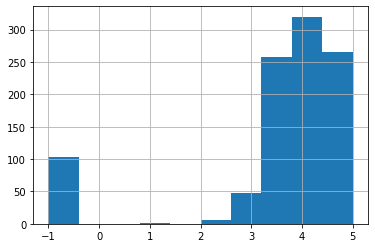

In [15]:
df.Rating.hist()

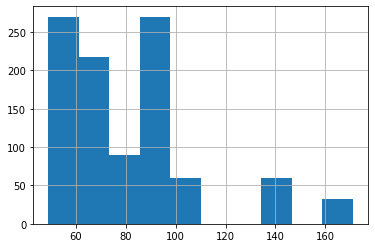

In [16]:
df.avg_salary.hist()

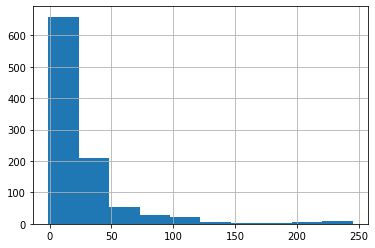

In [17]:
df.age.hist()

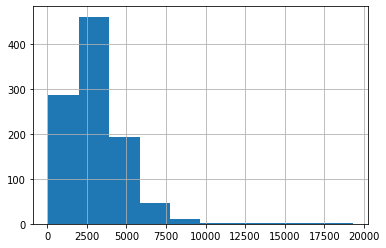

In [18]:
df.desc_len.hist()

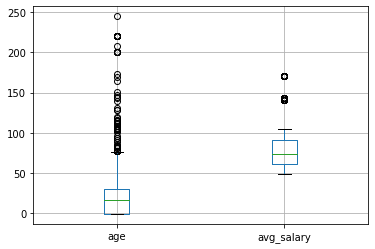

In [19]:
df.boxplot(column=['age','avg_salary'])

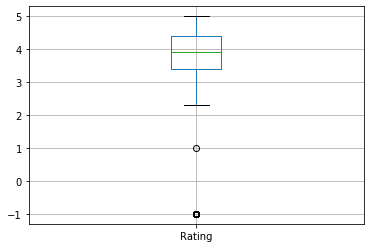

In [20]:
df.boxplot(column=['Rating'])

In [21]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.014855,0.153596,0.246611
avg_salary,-0.014855,1.000000,0.057026,-0.010008
Rating,0.153596,0.057026,1.000000,0.038933
desc_len,0.246611,-0.010008,0.038933,1.000000


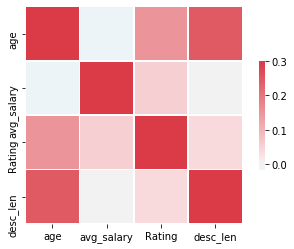

In [22]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3,center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink":.5})

In [23]:
# Drop Headquarters column
df.drop('Headquarters',inplace=True,axis=1)

In [24]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [25]:
df_cat = df[['Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue','company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority']]

graph for Location: total = 315


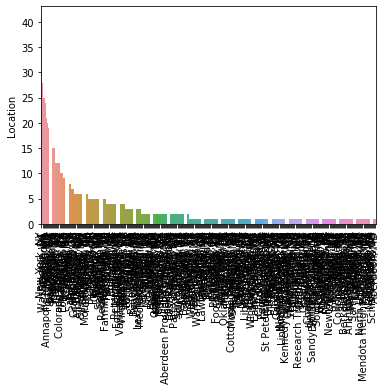

graph for Size: total = 9


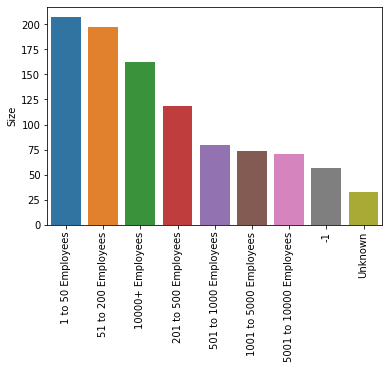

graph for Founded: total = 98


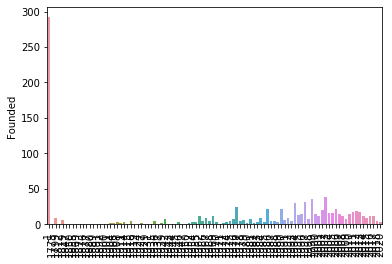

graph for Type of ownership: total = 12


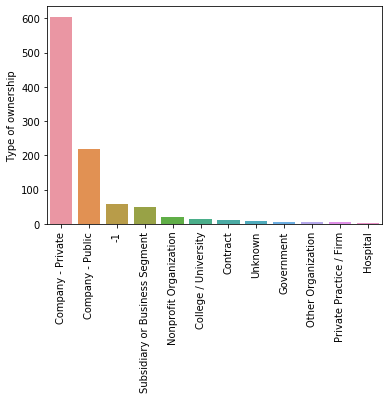

graph for Industry: total = 53


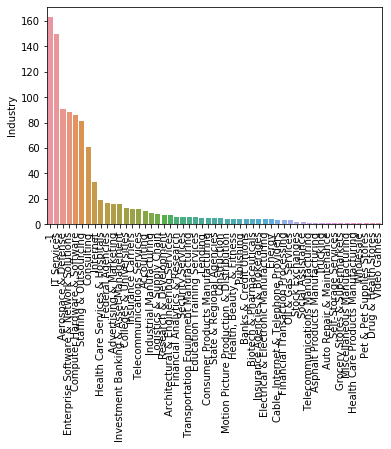

graph for Sector: total = 20


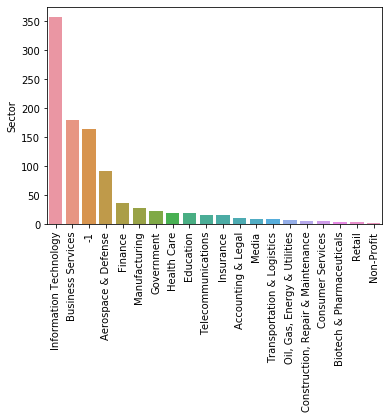

graph for Revenue: total = 14


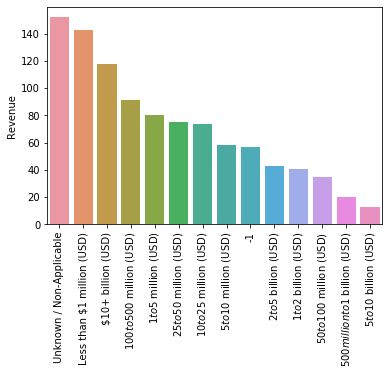

graph for company_txt: total = 585


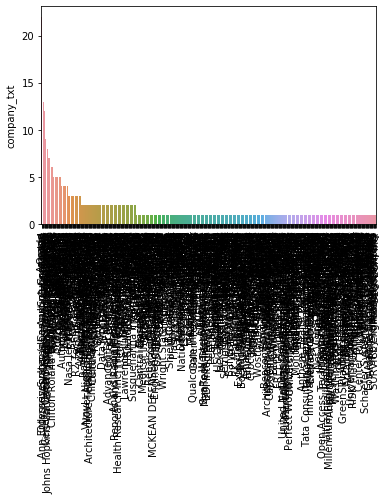

graph for job_state: total = 49


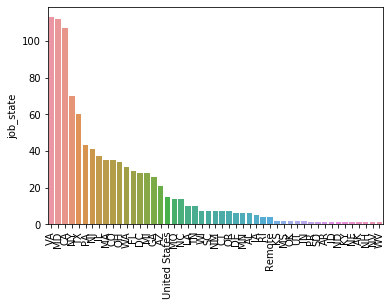

graph for age: total = 98


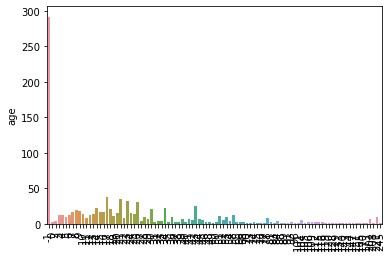

graph for backend_yn: total = 2


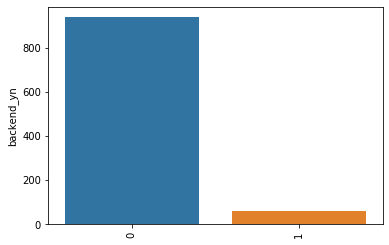

graph for python_yn: total = 2


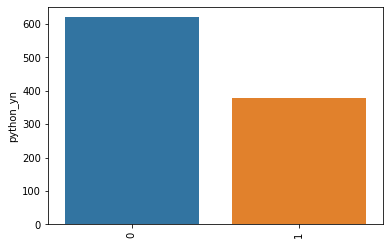

graph for java_yn: total = 2


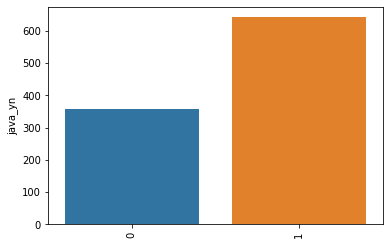

graph for database_yn: total = 2


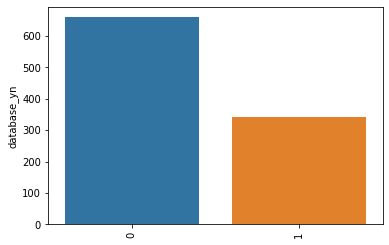

graph for linux_yn: total = 2


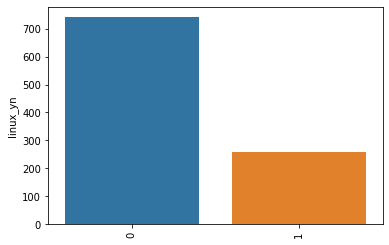

graph for networking_yn: total = 2


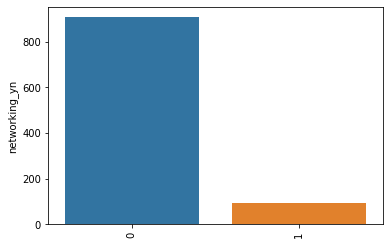

graph for testing_yn: total = 2


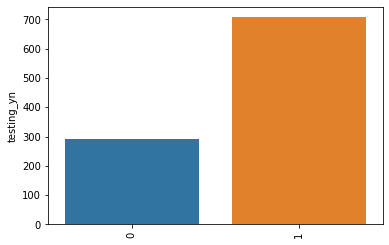

graph for cyber_yn: total = 2


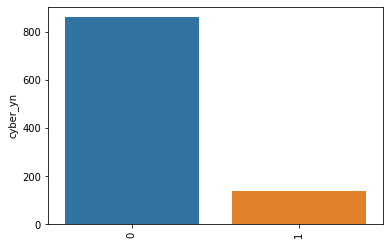

graph for aws_yn: total = 2


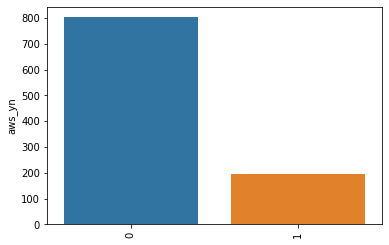

graph for job_simp: total = 7


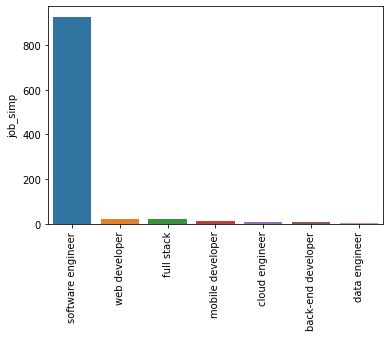

graph for seniority: total = 4


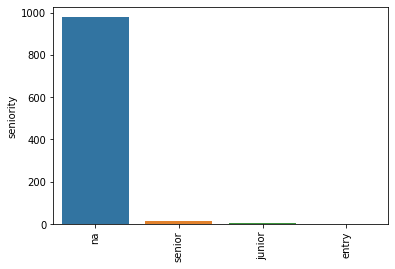

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

graph for Location: total = 20


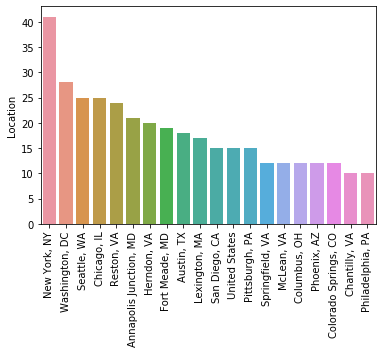

graph for company_txt: total = 20


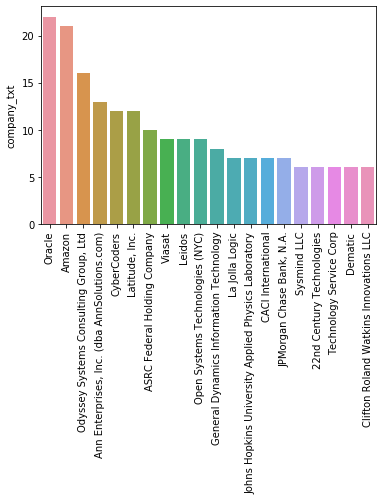

In [27]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d"%(i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [28]:
pd.pivot_table(df,index='job_simp',values='avg_salary')

,avg_salary
job_simp,
back-end developer,70.428571
cloud engineer,84.937500
data engineer,89.666667
full stack,90.000000
mobile developer,82.750000
software engineer,80.418642
web developer,76.119048


In [29]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('avg_salary',ascending=False)

,,avg_salary
job_state,job_simp,
MD,full stack,171.00
Remote,software engineer,171.00
WA,full stack,143.00
AL,mobile developer,141.50
ID,software engineer,141.50
...,...,...
CA,back-end developer,50.75
MD,back-end developer,49.50
NE,software engineer,49.50


In [30]:
pd.options.display.max_rows

60

In [31]:
pd.set_option('display.max_rows',None)

In [32]:
pd.pivot_table(df,index=['job_state','job_simp'],values='avg_salary').sort_values('job_state',ascending=False)

avg_salary
job_state     job_simp                      
WV            software engineer    71.000000
WI            software engineer    64.142857
WA            software engineer    78.816667
              full stack          143.000000
VA            web developer        67.250000
              software engineer    77.247664
              data engineer        90.000000
              cloud engineer       89.000000
              back-end developer   96.500000
United States cloud engineer       97.500000
              software engineer    88.541667
              web developer        89.000000
UT            software engineer   134.000000
TX            software engineer    78.803571
              mobile developer    141.500000
              full stack          129.750000
              data engineer        89.500000
TN            software engineer    85.166667
              full stack           92.500000
SD            software engineer    96.500000
SC            software engineer    93.357143
Remote        software engineer   171.000000
              cloud engineer       86.500000
RI            software engineer    82.250000
PR            software engineer    88.500000
PA            web developer        49.500000
              software engineer    85.743902
              data engineer        89.500000
OR            software engineer    92.571429
OK            software engineer    85.750000
OH            software engineer    85.030303
              mobile developer     96.500000
NY            full stack           61.000000
              back-end developer   81.833333
              software engineer    85.098485
NV            software engineer    56.000000
NM            software engineer    61.071429
NJ            web developer        53.500000
              software engineer    79.025641
              full stack           96.500000
NH            software engineer    88.500000
NE            software engineer    49.500000
ND            software engineer    91.500000
NC            web developer        88.500000
              full stack           53.500000
              software engineer    93.208333
MS            software engineer    61.000000
MO            software engineer    72.821429
MN            software engineer   115.400000
              full stack           89.500000
MI            software engineer    63.979167
              mobile developer     62.500000
MD            back-end developer   49.500000
              web developer        70.916667
              software engineer    79.095000
              mobile developer     74.125000
              full stack          171.000000
MA            mobile developer     85.000000
              full stack           74.500000
              web developer        76.500000
              software engineer    75.145161
LA            software engineer    72.750000
              full stack           56.000000
KY            software engineer    90.000000
KS            software engineer    60.250000
IN            software engineer    61.500000
IL            cloud engineer       83.750000
              software engineer    84.342857
ID            software engineer   141.500000
IA            full stack          105.000000
              software engineer    66.500000
GA            software engineer    78.680000
              mobile developer     86.500000
FL            web developer        56.000000
              software engineer    77.000000
              mobile developer     61.000000
DE            software engineer    79.200000
              full stack           96.500000
DC            full stack           67.166667
              software engineer    76.740000
CT            software engineer    89.142857
CO            software engineer    80.205882
              full stack          105.000000
CA            web developer        91.800000
              software engineer    81.704082
              full stack           49.000000
              cloud engineer       52.500000
              back-end develo

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'backend_yn',
       'python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn',
       'testing_yn', 'cyber_yn', 'aws_yn', 'job_simp', 'seniority',
       'desc_len'],
      dtype='object')

In [34]:
df_pivots = df[['Rating','Type of ownership','Industry', 'Sector', 'Revenue','backend_yn','python_yn', 'java_yn', 'database_yn', 'linux_yn', 'networking_yn','testing_yn', 'cyber_yn', 'aws_yn', 'job_simp','avg_salary']]

In [35]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 2.6    120.166667
 4.5     91.189189
 2.7     91.000000
 4.7     90.609375
 2.3     90.500000
 3.9     87.880000
 3.6     86.231481
 4.6     85.263889
 4.4     84.657143
 3.0     83.875000
 4.3     81.955882
 3.7     81.645455
 3.4     81.432432
 3.3     80.812500
 3.1     80.625000
 4.1     80.130435
 2.4     78.500000
 4.8     78.217391
 3.8     77.804348
 4.0     77.797872
 5.0     77.329670
 4.9     76.409091
 3.2     76.300000
-1.0     76.082524
 4.2     75.791667
 2.8     75.500000
 3.5     72.818182
 2.9     65.875000
 1.0     49.000000
Type of ownership
                                avg_salary
Type of ownership                         
Hospital                         90.000000
Private Practice / Firm          89.500000
College / University             88.807692
Company - Public                 83.162100
Company - Private                81.212397
-1                               77.657895
Contract                         77.136364

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [36]:
pd.pivot_table(df_pivots,index='Revenue',columns='java_yn',values='avg_salary',aggfunc='count')

java_yn,0,1
Revenue,,
$1 to $2 billion (USD),12,29
$1 to $5 million (USD),21,59
$10 to $25 million (USD),26,48
$10+ billion (USD),20,98
$100 to $500 million (USD),44,47
$2 to $5 billion (USD),19,24
$25 to $50 million (USD),26,49
$5 to $10 billion (USD),7,6
$5 to $10 million (USD),20,38


In [37]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

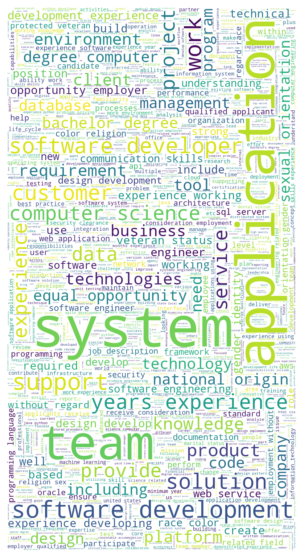

In [39]:
words =" ".join(df['Job Description'])

def punctuation_stop(text):
    filtered=[]
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered ])
wc = WordCloud(background_color="white",random_state=1, stopwords = STOPWORDS, max_words=2000,width=800,height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()


In [38]:
df.to_csv("eda_data.csv")